# Utilizando GroupBy

In [1]:
import numpy as np
import pandas as pd

In [2]:
file = "drinks.csv"
drinks = pd.read_csv(file)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
0,Afghanistan,0,0,0,0.0,34.660.000,Asia
1,Albania,89,132,54,4.9,2.876.000,Europe
2,Algeria,25,0,14,0.7,40.061.000,Africa
3,Andorra,245,138,312,12.4,77.281.000,Europe
4,Angola,217,57,45,5.9,28.081.000,Africa


In [3]:
#calculando a média de cerveja por todo o Dataset
drinks.beer_servings.mean()

106.16062176165804

In [4]:
# Calculando a media consumida pelo continente Europeu

drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

## Mas afinal, quem bebeu mais cerveja?

In [5]:
cerveja_continente = drinks.groupby('continent').beer_servings.mean()

In [6]:
#Ordenando
cerveja_continente.sort_values(ascending=False)

continent
Europe           193.777778
South America    175.083333
North America    145.434783
Oceania           89.687500
Africa            61.471698
Asia              37.045455
Name: beer_servings, dtype: float64

## Qual o máximo de cerveja consumida em cada continente?

In [7]:
# Funções de agregação como min e max também funcionam com groupby

drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [8]:
drinks.groupby('continent').beer_servings.agg(['count','mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [9]:
# Caso eu não especifique a coluna o groupby trará todas

drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


## Vamos plotar o primeiro gráfico

In [10]:
%matplotlib inline

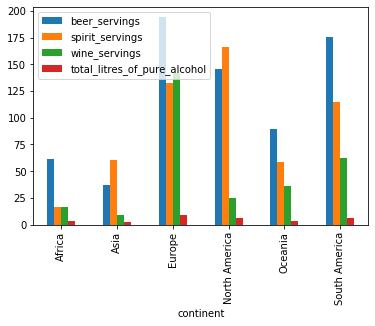

In [11]:
#agrupando as bebidas por continente, tirando a media e plotando o grafico

drinks.groupby('continent').mean().plot(kind='bar')

# Exercícios

###Leia o Dataset de ordens de sanduiche
###Calcule o valor das contas por order_id
###Calcule a quantidade de itens por order_id

In [12]:
file = 'Sanduiches.txt'
vendas = pd.read_table(file, sep='\t')
vendas.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [13]:
vendas['item_value'] = vendas.item_price.str.replace('$', '').astype(float)

In [14]:
vendas.head()

,order_id,quantity,item_name,choice_description,item_price,item_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [19]:
vendas_agr = vendas.groupby('order_id').item_value.sum()

In [20]:
vendas_agr.head(20)

order_id
1     11.56
2     16.98
3     12.67
4     21.00
5     13.70
6     17.50
7     15.70
8     10.88
9     10.67
10    13.20
11    12.38
12    14.37
13    10.88
14    10.08
15    10.88
16    10.68
17    10.08
18    24.90
19    13.90
20    36.20
Name: item_value, dtype: float64

In [21]:
qtd_agr = vendas.groupby('order_id').quantity.sum()

In [22]:
qtd_agr.head(10)

order_id
1     4
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     3
10    2
Name: quantity, dtype: int64

In [17]:
vendas.groupby('order_id').item_value.agg(['count', 'mean','max', 'min']).head(20)

,count,mean,max,min
order_id,,,,
1,4,2.890,3.39,2.39
2,1,16.980,16.98,16.98
3,2,6.335,10.98,1.69
4,2,10.500,11.75,9.25
5,2,6.850,9.25,4.45
6,2,8.750,8.75,8.75
7,2,7.850,11.25,4.45
8,2,5.440,8.49,2.39
9,2,5.335,8.49,2.18


In [23]:
vendas_agr.describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_value, dtype: float64

In [24]:
vendas.groupby('order_id').item_value.agg(['count','mean','min','max','sum']).head(10)

,count,mean,min,max,sum
order_id,,,,,
1,4,2.890,2.39,3.39,11.56
2,1,16.980,16.98,16.98,16.98
3,2,6.335,1.69,10.98,12.67
4,2,10.500,9.25,11.75,21.00
5,2,6.850,4.45,9.25,13.70
6,2,8.750,8.75,8.75,17.50
7,2,7.850,4.45,11.25,15.70
8,2,5.440,2.39,8.49,10.88
9,2,5.335,2.18,8.49,10.67


In [25]:
vendas_agr.max()

205.25

In [26]:
vendas_agr.min()

10.08